In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from itertools import cycle
from sklearn.cluster import KMeans

In [6]:
orders  = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\orders.csv\orders.csv')
department = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\departments.csv\departments.csv')
aisles = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\aisles.csv\aisles.csv')
products = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\products.csv\products.csv')
prod_order = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\order_products__train.csv\order_products__train.csv')
prod_order_p = pd.read_csv(r'C:\Users\Rathang Rajpal\Desktop\sem 6\Intern_Xebia\Customer Segmentation\codes\instakart data\order_products__prior.csv\order_products__prior.csv')

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
department.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
prod_order.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [12]:
prod_order_p.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
prod_dept = products.merge(department,how = 'left',on = 'department_id')
prod_dept.head()

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen
4,5,Green Chile Anytime Sauce,5,13,pantry


In [8]:
product_dept = prod_dept.set_index('product_id').drop(['product_name','aisle_id','department_id'],axis = 1)

In [9]:
product_dept.head()

,department
product_id,
1,snacks
2,pantry
3,beverages
4,frozen
5,pantry


In [10]:
d = {}
for i in product_dept.index:
    d[i] = product_dept['department'][i]

In [11]:
d[29429]

'breakfast'

In [13]:
customer_orders = pd.merge(orders,prod_order,on = 'order_id')

In [14]:
customer_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1


In [15]:
cod = pd.merge(customer_orders,product_dept,how = 'left',on = 'product_id')

In [16]:
cod.head(20)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department
0,1187899,1,train,11,4,8,14.0,196,1,1,beverages
1,1187899,1,train,11,4,8,14.0,25133,2,1,dairy eggs
2,1187899,1,train,11,4,8,14.0,38928,3,1,dairy eggs
3,1187899,1,train,11,4,8,14.0,26405,4,1,household
4,1187899,1,train,11,4,8,14.0,39657,5,1,snacks
5,1187899,1,train,11,4,8,14.0,10258,6,1,snacks
6,1187899,1,train,11,4,8,14.0,13032,7,1,breakfast
7,1187899,1,train,11,4,8,14.0,26088,8,1,snacks
8,1187899,1,train,11,4,8,14.0,27845,9,0,dairy eggs
9,1187899,1,train,11,4,8,14.0,49235,10,1,dairy eggs


In [17]:
tdf = pd.crosstab(cod.user_id,cod.department)

In [18]:
tdf.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,2,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,0,1,0,7,5
5,0,0,0,0,0,0,0,1,0,0,...,1,2,0,0,0,1,0,0,4,0
7,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
8,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,13,0


In [15]:
print(tdf.shape)

(131209, 21)


In [19]:
tdf1 = tdf[:30000]

In [20]:
print(tdf1.shape)

(30000, 21)


In [21]:
tdf1.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,2,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,0,1,0,7,5
5,0,0,0,0,0,0,0,1,0,0,...,1,2,0,0,0,1,0,0,4,0
7,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
8,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,13,0


In [50]:
X1 = tdf1
pca = PCA(n_components=5, whiten=True).fit(X1)
X_pca = pca.transform(X)

In [23]:
print(pca.components_)

[[-6.62015561e-03  1.39078600e-02  4.09670058e-02  1.74928741e-02
   2.00256970e-02  2.28198094e-03  6.28371430e-02  2.45852398e-01
   4.79985060e-02  4.54430730e-02  7.46381588e-02 -6.37055024e-03
   1.54679699e-02  3.47135704e-02  8.79896910e-03  8.08334225e-04
   7.41430684e-02 -7.68591326e-04 -7.67224733e-04  9.54599616e-01
   6.86933122e-02]
 [-6.18963428e-04  3.53942236e-02  1.05440989e-01  2.59183557e-01
   8.98687427e-02 -6.48990068e-05  6.27151368e-02  7.12113192e-01
   8.38110271e-02  8.30106489e-02  3.02544329e-01  5.28835716e-02
   1.47973669e-02  3.21827855e-02  1.67506170e-02  2.47629820e-03
   1.33126642e-01  2.92279084e-02  7.60654776e-03 -2.74537685e-01
   4.44461679e-01]
 [ 2.75337829e-03 -2.05817474e-02 -2.33716584e-03  3.54555479e-01
   3.25784350e-02  1.47271955e-03  3.24895434e-03 -6.06331021e-01
   2.67572495e-02 -2.75586302e-03  1.74067387e-01  4.84057714e-02
   5.47339718e-03 -9.23172314e-03  7.48635178e-03  1.61255171e-03
   4.74936232e-03  2.63228679e-02  6.5

In [24]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.47037583 0.13475355 0.07771766 0.05910639 0.05598297]
0.7979363945412031


In [25]:
w = []
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_pca)
    w.append(kmeans.inertia_)

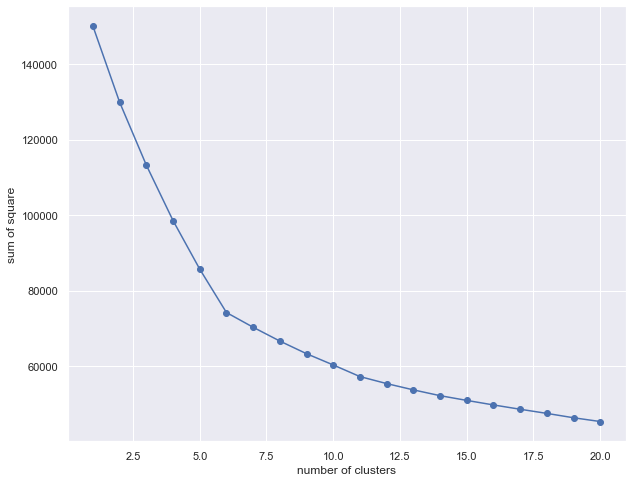

In [26]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21),w,marker = 'o')
plt.xlabel('number of clusters')
plt.ylabel('sum of square')
plt.show()

In [27]:
fin_cluster =  KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)

In [28]:
fin_cluster.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [29]:
tdf1_cl = pd.concat([tdf1.reset_index(drop =True),pd.DataFrame(X_pca)], axis = 1)
tdf1_cl.columns.values[-5:] = ['component 1','component 2', 'component 3', 'component 4','component 5']
tdf1_cl['segment'] = fin_cluster.labels_

In [30]:
tdf1_cl.head()

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,personal care,pets,produce,snacks,component 1,component 2,component 3,component 4,component 5,segment
0,0,0,0,2,1,0,0,4,0,0,...,0,0,0,3,-0.678280,1.804987,0.036818,-1.598038,0.209119,1
1,0,0,0,0,0,0,3,1,3,0,...,1,0,7,5,1.345711,1.787356,3.515406,6.276189,-3.285159,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,4,0,0.145503,-0.833145,-0.384064,-0.179890,-0.155422,3
3,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,-0.633598,0.255722,0.619014,-0.251020,3.346709,5
4,0,0,1,0,0,0,1,1,1,0,...,0,0,13,0,2.601123,-2.044155,0.127294,-0.199045,-0.047916,4


In [31]:
tdf1.head()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,2,1,0,0,4,0,0,...,1,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,3,1,3,0,...,0,0,0,0,0,0,1,0,7,5
5,0,0,0,0,0,0,0,1,0,0,...,1,2,0,0,0,1,0,0,4,0
7,0,0,0,5,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
8,0,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,13,0


In [32]:
tdf1_cl['segment_name'] = tdf1_cl['segment'].map({0:'first',1:'second',2:'third',3:'fourth',4:'fifth',5:'sixth'})

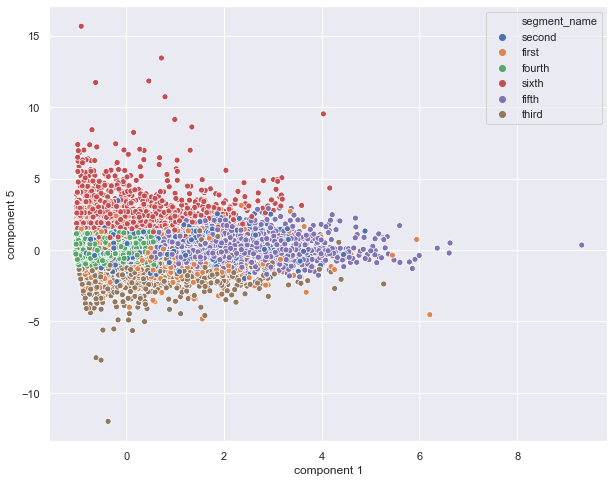

In [33]:
x_axis = tdf1_cl['component 1']
y_axis = tdf1_cl['component 5']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis,y_axis, hue = tdf1_cl['segment_name'],)
plt.show()

In [34]:
import tensorflow

In [35]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

In [36]:
tdf1_cl.head()

,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,pets,produce,snacks,component 1,component 2,component 3,component 4,component 5,segment,segment_name
0,0,0,0,2,1,0,0,4,0,0,...,0,0,3,-0.678280,1.804987,0.036818,-1.598038,0.209119,1,second
1,0,0,0,0,0,0,3,1,3,0,...,0,7,5,1.345711,1.787356,3.515406,6.276189,-3.285159,0,first
2,0,0,0,0,0,0,0,1,0,0,...,0,4,0,0.145503,-0.833145,-0.384064,-0.179890,-0.155422,3,fourth
3,0,0,0,5,0,0,0,1,0,0,...,0,1,0,-0.633598,0.255722,0.619014,-0.251020,3.346709,5,sixth
4,0,0,1,0,0,0,1,1,1,0,...,0,13,0,2.601123,-2.044155,0.127294,-0.199045,-0.047916,4,fifth


In [45]:
data= tdf1_cl.loc[:,'component 1':'segment']

In [46]:
data.head()

,component 1,component 2,component 3,component 4,component 5,segment
0,-0.678280,1.804987,0.036818,-1.598038,0.209119,1
1,1.345711,1.787356,3.515406,6.276189,-3.285159,0
2,0.145503,-0.833145,-0.384064,-0.179890,-0.155422,3
3,-0.633598,0.255722,0.619014,-0.251020,3.346709,5
4,2.601123,-2.044155,0.127294,-0.199045,-0.047916,4


In [47]:
data.shape

(30000, 6)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [55]:
X = data.loc[:,'component 1':'component5']
X.head()

,component 1,component 2,component 3,component 4,component 5
0,-0.678280,1.804987,0.036818,-1.598038,0.209119
1,1.345711,1.787356,3.515406,6.276189,-3.285159
2,0.145503,-0.833145,-0.384064,-0.179890,-0.155422
3,-0.633598,0.255722,0.619014,-0.251020,3.346709
4,2.601123,-2.044155,0.127294,-0.199045,-0.047916


In [56]:
y = data['segment']
y.head()

0    1
1    0
2    3
3    5
4    4
Name: segment, dtype: int32

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
X_train

array([[ 2.26485053, -0.51067377, -0.10087182, -0.72644144,  0.32786151],
       [-0.39862765, -0.49852713, -0.42517166,  0.4569752 , -0.38668945],
       [-0.6361374 ,  0.50748073,  1.21036225, -0.84724998,  1.41730465],
       ...,
       [-0.89049498,  0.00475865, -1.08179576, -0.37643051, -0.2912745 ],
       [ 1.35106384,  0.98687296, -1.79303596, -0.92277798,  1.29901783],
       [-0.48618199, -0.8673853 ,  0.15125007, -0.11176072,  0.51695959]])

In [73]:
model1 = Sequential()

In [71]:
#classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 5))
#classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
#classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'sigmoid'))

In [74]:
model1.add(Dense(4, activation='relu', input_shape=(5,)))
#model.add(Dense(output_dim = 6, activation = 'relu'))


In [75]:
model1.add(Dense(6, activation='softmax'))

In [77]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 4)                 24        
_________________________________________________________________
dense_12 (Dense)             (None, 6)                 30        
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


In [81]:
model1.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [82]:
history = model1.fit(X_train, y_train, batch_size=100, epochs=10, verbose=2, validation_data=(X_test, y_test))

Train on 24000 samples, validate on 6000 samples
Epoch 1/10
24000/24000 - 3s - loss: 1.7357 - accuracy: 0.5448 - val_loss: 1.5019 - val_accuracy: 0.6455
Epoch 2/10
24000/24000 - 1s - loss: 1.2792 - accuracy: 0.6899 - val_loss: 1.0770 - val_accuracy: 0.7225
Epoch 3/10
24000/24000 - 1s - loss: 0.9320 - accuracy: 0.7288 - val_loss: 0.8258 - val_accuracy: 0.7260
Epoch 4/10
24000/24000 - 1s - loss: 0.7540 - accuracy: 0.7454 - val_loss: 0.7027 - val_accuracy: 0.7448
Epoch 5/10
24000/24000 - 1s - loss: 0.6563 - accuracy: 0.7642 - val_loss: 0.6260 - val_accuracy: 0.7647
Epoch 6/10
24000/24000 - 1s - loss: 0.5891 - accuracy: 0.7818 - val_loss: 0.5650 - val_accuracy: 0.7840
Epoch 7/10
24000/24000 - 1s - loss: 0.5316 - accuracy: 0.7983 - val_loss: 0.5088 - val_accuracy: 0.7982
Epoch 8/10
24000/24000 - 1s - loss: 0.4799 - accuracy: 0.8285 - val_loss: 0.4610 - val_accuracy: 0.8427
Epoch 9/10
24000/24000 - 1s - loss: 0.4377 - accuracy: 0.8488 - val_loss: 0.4225 - val_accuracy: 0.8560
Epoch 10/10
240